In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def wspolczynnik(i, N):
    k = 0
    if i == 0 or i == N:
        k = 1
    elif i % 2 == 1:
        k = 4
    elif i % 2 == 0:
        k = 2
    return k

In [39]:
R=1
mi0=1
e0=1
sigma=1
N=201
M=201
dteta=np.pi/N
dfi=2*np.pi/M
w=0.1
alfa=0
w_tab=np.zeros(3)
w_tab[0]=w*np.sin(alfa)
w_tab[1]=w*np.cos(alfa)
w_tab[2]=0
K=41
L=3
dx=2*L/K
dy=2*L/K
POT=np.zeros((np.size(np.linspace(-L, L, 41)),np.size(np.linspace(-L, L, 41))))
E_X=np.zeros((np.size(np.linspace(-L, L, 41)),np.size(np.linspace(-L, L, 41))))
E_Y=np.zeros((np.size(np.linspace(-L, L, 41)),np.size(np.linspace(-L, L, 41))))
B_X=np.zeros((np.size(np.linspace(-L, L, 41)),np.size(np.linspace(-L, L, 41))))
B_Y=np.zeros((np.size(np.linspace(-L, L, 41)),np.size(np.linspace(-L, L, 41))))
X=np.zeros((np.size(np.linspace(-L, L, 41)),np.size(np.linspace(-L, L, 41))))
Y=np.zeros((np.size(np.linspace(-L, L, 41)),np.size(np.linspace(-L, L, 41))))




In [40]:
def iloczyn_wektorowy(tablica1, tablica2, wynik):
    #wynik = [0, 0, 0]
    wynik[0] = tablica1[1] * tablica2[2] - tablica1[2] * tablica2[1]
    wynik[1] = tablica1[2] * tablica2[0] - tablica1[0] * tablica2[2]
    wynik[2] = tablica1[0] * tablica2[1] - tablica1[1] * tablica2[0]

In [41]:
start_x = -L
krok_x = dx
koniec_x = L
start_y = -L
krok_y = dy
koniec_y = L

x = start_x
licznik_x=0
while x <= koniec_x:
    y = start_y
    licznik_y=0
    while y <= koniec_y:
        z=0
        ##==== zerowanie zmiennych przed całkowaniem ====================
        v =0
        ex =0
        ey =0
        bx =0
        by =0
        ##==== całkowanie ====================
        for i in range(0, N+1):
            for j in range(0,M+1):
                teta_prim=dteta*i
                fi_prim=dfi*j
                x_prim=R*np.sin(teta_prim)*np.cos(fi_prim)
                y_prim=R*np.sin(teta_prim)*np.sin(fi_prim)
                z_prim=R*np.cos(teta_prim)
                modul=np.sqrt((x-x_prim)*(x-x_prim)+(y-y_prim)*(y-y_prim)+(z-z_prim)*(z-z_prim))
                W=sigma*R*R*dteta*dfi/(np.pi*36)
                v=v+(W*wspolczynnik(i,N)*wspolczynnik(j,M)*np.sin(teta_prim)/modul)
                ex=ex+(W*wspolczynnik(i,N)*wspolczynnik(j,M)*np.sin(teta_prim)*(x-x_prim)/(modul*modul*modul))
                ey=ey+(W*wspolczynnik(i,N)*wspolczynnik(j,M)*np.sin(teta_prim)*(y-y_prim)/(modul*modul*modul))
                g1 = [0, 0, 0]
                g2 = [0, 0, 0]
                iloczyn_wektorowy(w_tab, [x_prim, y_prim, z_prim], g1)
                iloczyn_wektorowy([x-x_prim, y-y_prim, z-z_prim], g1, g2)
                bx=bx+(W*wspolczynnik(i,N)*wspolczynnik(j,M)*np.sin(teta_prim)*g2[0]/(modul*modul*modul))
                by=by+(W*wspolczynnik(i,N)*wspolczynnik(j,M)*np.sin(teta_prim)*g2[1]/(modul*modul*modul))
        POT[licznik_x][licznik_y]=v
        E_X[licznik_x][licznik_y]=ex
        E_Y[licznik_x][licznik_y]=ey
        B_X[licznik_x][licznik_y]=-bx
        B_Y[licznik_x][licznik_y]=-by
        X[licznik_x][licznik_y]=x
        Y[licznik_x][licznik_y]=y
                
        y += krok_y
        licznik_y=licznik_y+1
    print(x)
    x += krok_x
    licznik_x=licznik_x+1

-3
-2.8536585365853657
-2.7073170731707314
-2.560975609756097
-2.414634146341463
-2.2682926829268286
-2.1219512195121943
-1.9756097560975603
-1.8292682926829262
-1.6829268292682922
-1.5365853658536581
-1.390243902439024
-1.24390243902439
-1.097560975609756
-0.9512195121951218
-0.8048780487804876
-0.6585365853658535
-0.5121951219512193
-0.36585365853658514
-0.219512195121951
-0.07317073170731686
0.07317073170731728
0.21951219512195141
0.3658536585365856
0.5121951219512197
0.6585365853658539
0.8048780487804881
0.9512195121951222
1.0975609756097564
1.2439024390243905
1.3902439024390245
1.5365853658536586
1.6829268292682926
1.8292682926829267
1.9756097560975607
2.121951219512195
2.268292682926829
2.4146341463414633
2.5609756097560976
2.707317073170732
2.853658536585366


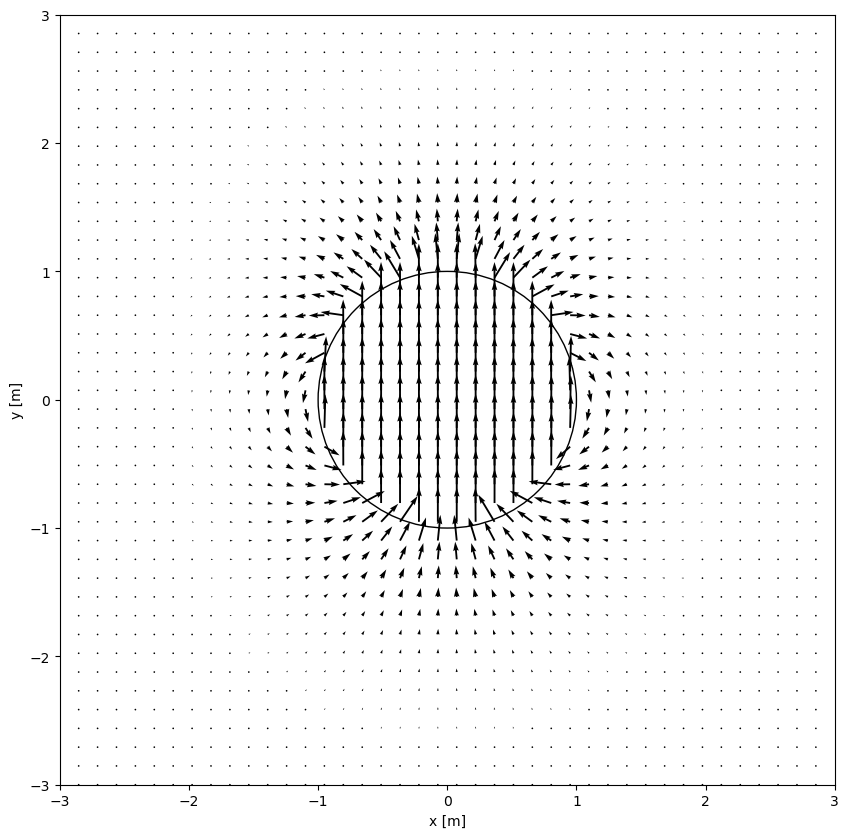

In [42]:
from matplotlib.patches import Circle
plt.figure(figsize=(10, 10))
plt.quiver(X, Y, B_X, B_Y, scale=1.5)


# Dodanie okręgu (rzutu 2D sfery)
circle = Circle((0, 0), 1, edgecolor='black', facecolor='none')
plt.gca().add_patch(circle)
#plt.title('Indukcja pola magnetycznego')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.xlim(-L, L)
plt.ylim(-L, L)

plt.show()

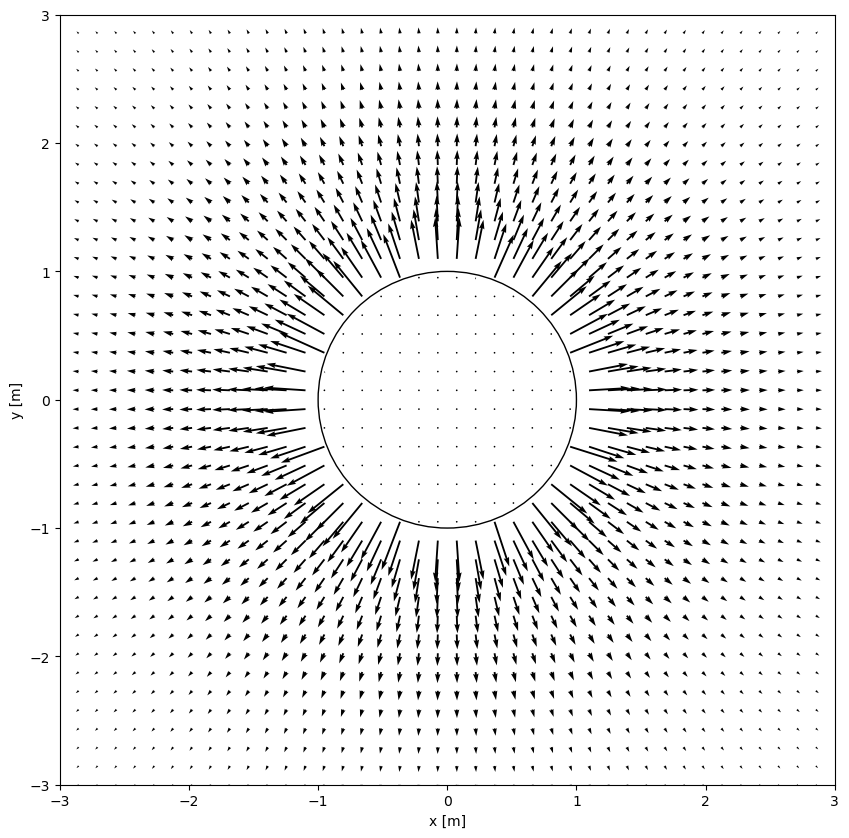

In [43]:
plt.figure(figsize=(10, 10))
plt.quiver(X, Y, E_X, E_Y)
circle = Circle((0, 0), 1, edgecolor='black', facecolor='none')
plt.gca().add_patch(circle)
#lt.title('Natężenie pola elektrycznego')


plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.xlim(-L, L)
plt.ylim(-L, L)

plt.show()

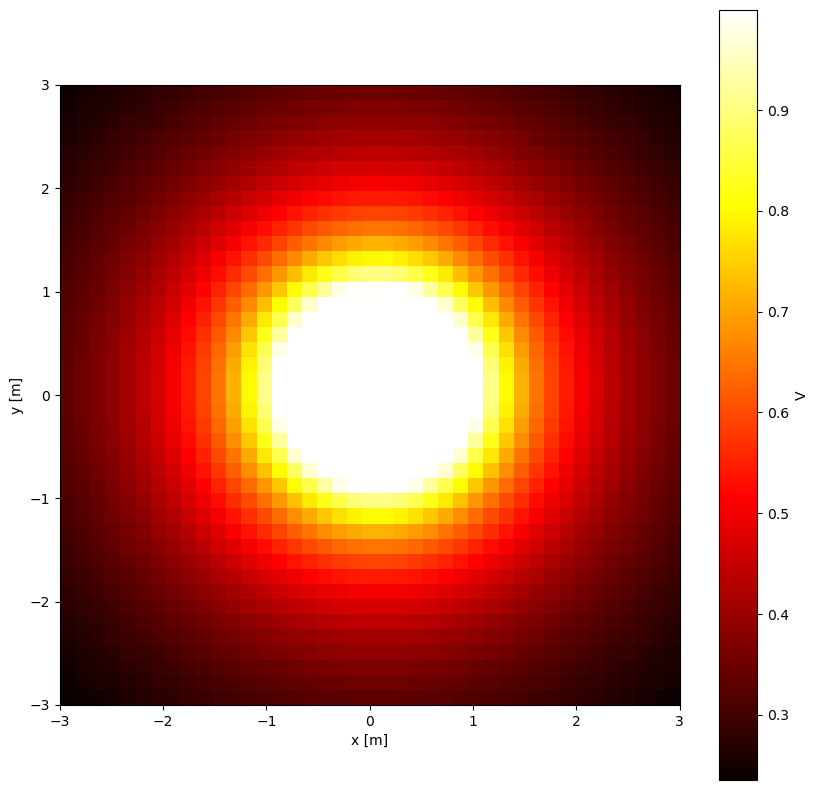

In [44]:
# Wykres potencjału elektrycznego
plt.figure(figsize=(10, 10))
plt.imshow(POT, extent=(-L, L, -L, L), origin='lower', cmap='hot')
plt.colorbar(label='V')
#plt.title('Potencjał elektryczny')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()

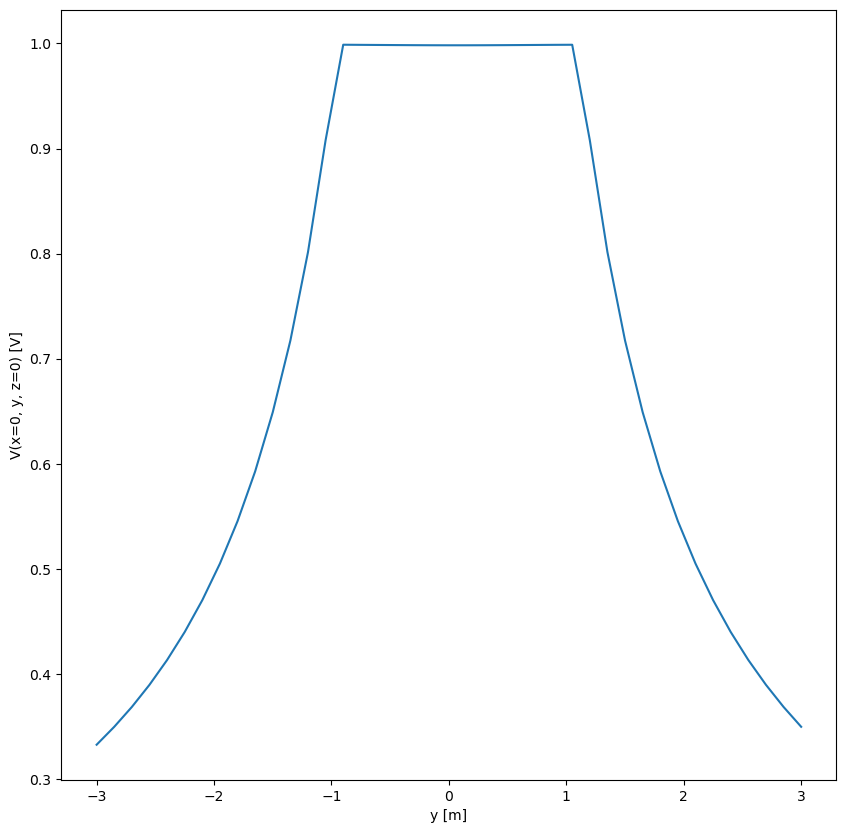

In [45]:
przekroj1=np.zeros(np.size(np.linspace(-L, L, 41)))
for i in range(0, np.size(np.linspace(-L, L, 41))):
    przekroj1[i]=POT[21][i]

iks=np.linspace(-L, L, 41)
plt.plot(iks, przekroj1)
plt.xlabel('y [m]')
plt.ylabel('V(x=0, y, z=0) [V]')
plt.show()